In [1]:
pip install mne

  Using cached https://files.pythonhosted.org/packages/92/ab/9b79f927b599da515335afb4b666a7bb336930a6d8345e7b483a9980a9c1/mne-0.20.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/f9/f7a7e5009711579c72da2725174825e5056741bf4001815d097eef1b2e17/scipy-1.5.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3d/d1/90cd7e0b27ee86d77f5386d38b74520486100286d50772377791b6ef22ff/numpy-1.19.1-cp37-cp37m-manylinux1_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install GoogleDriveDownloader

  Using cached https://files.pythonhosted.org/packages/3a/5c/485e8724383b482cc6c739f3359991b8a93fb9316637af0ac954729545c9/googledrivedownloader-0.4-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import numpy as np
import json
import mne

In [4]:
dataset_ids = {
    1: '1ym3JqI4_ZYNSBLxoF1vNxI5Hsgur_tha',
    2: '1tJ5tHbE-2jwr0gA33Gd873lRPao-e4dF',
    3: '1tXdpY-mser01POaP6Qwixny6LjsXXoXB',
    4: '1T00cliWp5yqqbbWZ7-rf2X4tOUQ-PvIQ',
    5: '1CYsBFMul9zB_vCy0XD7XVfKUl8vihDYZ',
    6: '1io6jdALBKeopELWXahPzuAi6EfYDgviW',
    7: '1YDkheRDPNDR1ujsqqC_SY6cebWHkw9Xt',
    8: '1jjoQJFDCi7O9Q-iaReAPpQnxC-HIKpQi',
}
label_id = '1mD5MXoh6tfQJFXIvdw2MQsEu6vZka6C0'
desc = '14kYNBZYdttqmSS_Vz6Bm_ztG9Uw1MC0y'

# ALTERE O ID DO DATASET DE SUA ESCOLHA AQUI ##################################
DS = 6

In [5]:
gdd.download_file_from_google_drive(file_id=dataset_ids[DS],
                                    dest_path='files/data.npy',
                                    showsize=True)
# download do arquivo de marcações
gdd.download_file_from_google_drive(file_id=label_id,
                                    dest_path='files/labels.npy', showsize=True)

# download do arquivo de descrição
gdd.download_file_from_google_drive(file_id=desc,
                                    dest_path='files/descriptor.json',
                                    showsize=True)

295.3 MiBDone.
0.0 BDone.
0.0 BDone.


In [6]:
X = np.load('files/data.npy')
y = np.load('files/labels.npy')
desc_file = open('files/descriptor.json')
descriptor = json.loads(desc_file.read())
desc_file.close()
print('Estruturas => dados', X.shape, 'labels', y.shape)

Estruturas => dados (125, 257, 1205) labels (125,)


In [7]:
#Os dados estão estruturados em numpy arrays.

#O "shape" (125, 257, 1205) para os dados EEG de X, significa que existem 125 trials (tradução aceitável: ensaio, julgamento), 257 channels que representam os eletrodos e 1205 dados que representam o potencial mensurado em ponto flutuante. Este é um array com três dimensões.

#O "shape" (125,) para os dados de labels ou marcadores y, apresentam qual é o eletrodo respectivo a cada trial. Os labels estão com valores numéricos como é mostrado a seguir, o que facilita o processamento, mas não é intuitivo.

In [8]:
print('Características do voluntário:', descriptor[str(DS)])
print('\nRótulos:', descriptor['frequencies'])
print('\nTaxa de amostragem:', descriptor['sampling_rate'])

Características do voluntário: {'age': '31', 'capsize': 'Adult Medium', 'gender': 'Female', 'hairtype': 'Thick', 'handedness': 'Right'}

Rótulos: {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}

Taxa de amostragem: 250


In [9]:
X = X[:,:256,:]
ch_names = X.shape[1]
sfreq = X.shape[-1]
ch_types = 'eeg'

info = mne.create_info(ch_names=ch_names, sfreq=250.0, ch_types=ch_types)

In [10]:
events = [[i, 0, e] for i, e in enumerate(y)]
obj = mne.EpochsArray(X, info, events=np.array(events))

125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [11]:
obj

<EpochsArray  |   125 events (all good), 0 - 4.816 sec, baseline off, ~294.7 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>

EGI 256
Creating RawArray with float64 data, n_channels=256, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


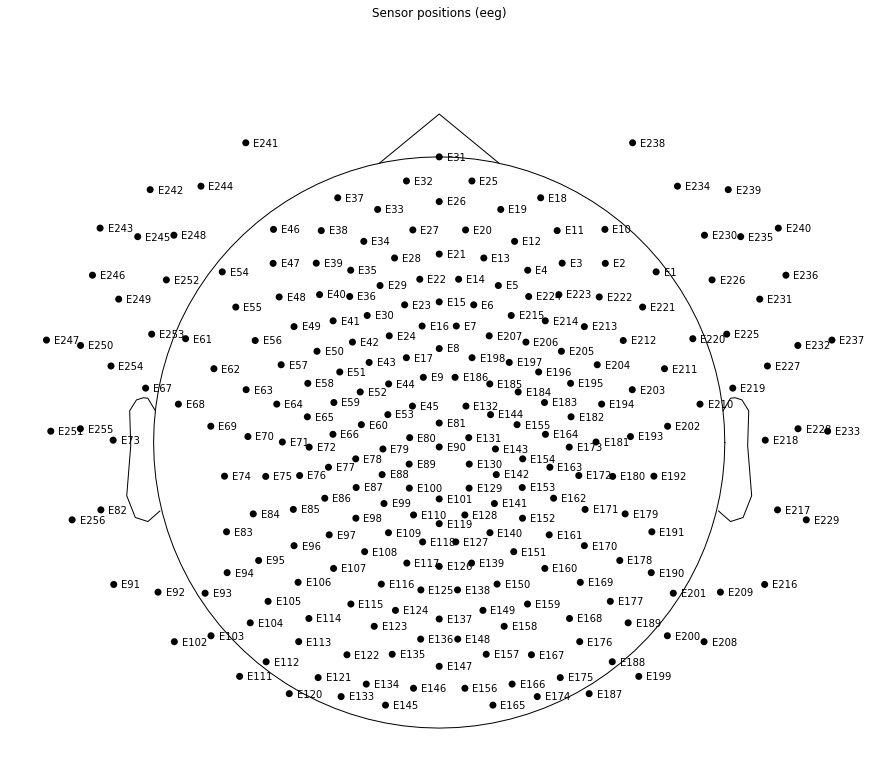

10-20 SYSTEM
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


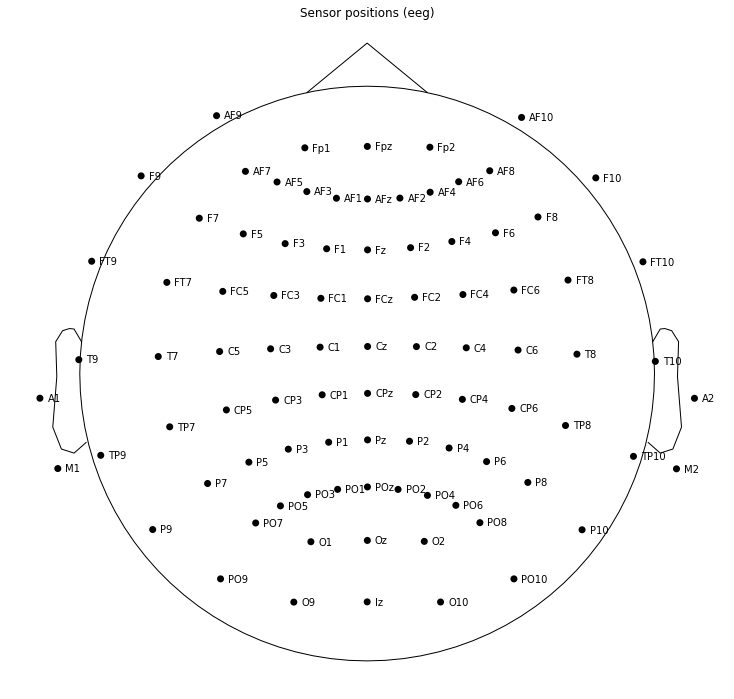


125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Setting up band-pass filter from 4 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)

(125, 256, 1205)
(125, 3, 1205)
    Using multitaper spectrum estimation with 7 DPSS windows


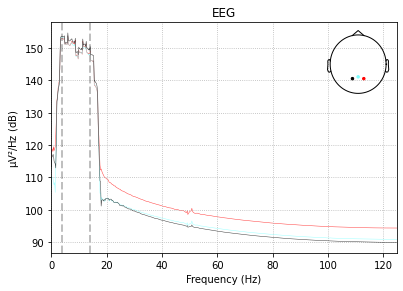

Using multitaper spectrum estimation with 7 DPSS windows


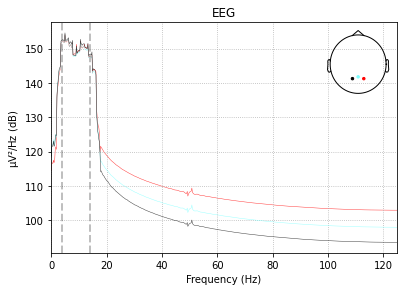

Using multitaper spectrum estimation with 7 DPSS windows


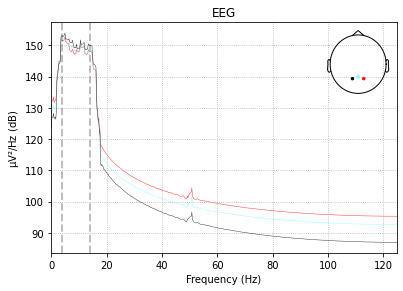

Using multitaper spectrum estimation with 7 DPSS windows


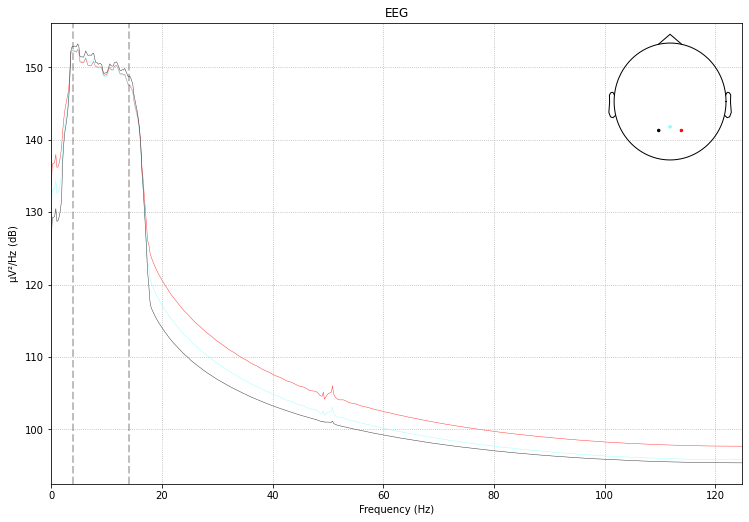

In [12]:

import matplotlib

%matplotlib inline
# aumentando a escala das figuras no matplotlib (padrão 6. x 4.)
matplotlib.rcParams['figure.figsize'] = [12, 8]
import mne

# objeto com o nome dos canais pelo modelo da touca utilizada
montage = mne.channels.make_standard_montage('EGI_256')
# criando o objeto `info` (o restante dos valores já temos)
info = mne.create_info(montage.ch_names,
                       sfreq=descriptor['sampling_rate'],
                       ch_types='eeg')
info.set_montage(montage)
info


# plotando o padrão EGI 256
print('EGI 256')
montage.plot()
# plotando o padrão 10-20
print('10-20 SYSTEM')
# neste padrão a figura estava ficando maior, então diminuí
matplotlib.rcParams['figure.figsize'] = [10, 7]
mne.channels.make_standard_montage('standard_1020').plot()
print()

X = X[:,:256,:]
# objeto event é uma matriz tridimensional conforme explicado em aula
events = np.array([[i, 0, e] for i, e in enumerate(y)])
# instanciando objeto EpochArray
epoch = mne.EpochsArray(X, info, events=events)
epoch

epoch_ex = epoch.copy().pick_channels(['E116', 'E126', 'E150'])
epoch_ex.filter(l_freq=4.0, h_freq=14.0)
epoch_ex

print(epoch.get_data().shape)
print(epoch_ex.get_data().shape)

matplotlib.rcParams['figure.figsize'] = [6., 4.]

# escolhendo (filtrando) somente o evento '1'
e = '1'
# selecionando alguns trials aleatórios (3, 9 e 11)
for i in (3, 9, 11):
    epoch_ex[e][-i].plot_psd()
# mostrando todos os trials do evento '1'
matplotlib.rcParams['figure.figsize'] = [12., 8.]
epoch_ex[e].plot_psd()
print()